# The ultimate goal of Crime time prediction :
Takes in crime details (e.g., type of crime, location, community area) and outputs
Hour, Day of Week, (day and month if possible)

In [86]:
! pip install statsmodels


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [88]:
data = pd.read_csv('/Users/saitejasriyerramsetti/Desktop/chicago crime/data/Crimes_-_2001_to_Present_20240918.csv')
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [89]:
data.shape  

(8156508, 22)

In [90]:
data.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13553
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614829
Community Area          613453
FBI Code                     0
X Coordinate             89841
Y Coordinate             89841
Year                         0
Updated On                   0
Latitude                 89841
Longitude                89841
Location                 89841
dtype: int64

In [91]:
columns_to_drop = ['X Coordinate', 'Y Coordinate', 'Location', 'Location Description']
data = data.drop(columns=columns_to_drop, axis=1, inplace=False)


In [92]:
data.isnull().sum() 

ID                     0
Case Number            0
Date                   0
Block                  0
IUCR                   0
Primary Type           0
Description            0
Arrest                 0
Domestic               0
Beat                   0
District              47
Ward              614829
Community Area    613453
FBI Code               0
Year                   0
Updated On             0
Latitude           89841
Longitude          89841
dtype: int64

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8156508 entries, 0 to 8156507
Data columns (total 18 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ID              int64  
 1   Case Number     object 
 2   Date            object 
 3   Block           object 
 4   IUCR            object 
 5   Primary Type    object 
 6   Description     object 
 7   Arrest          bool   
 8   Domestic        bool   
 9   Beat            int64  
 10  District        float64
 11  Ward            float64
 12  Community Area  float64
 13  FBI Code        object 
 14  Year            int64  
 15  Updated On      object 
 16  Latitude        float64
 17  Longitude       float64
dtypes: bool(2), float64(5), int64(3), object(8)
memory usage: 1011.2+ MB


In [94]:
# Remove 2001–2002 records
data = data[~data['Year'].isin([2001, 2002])]  ## Moasot of the missing values are from these two years so we are removing

In [95]:
# Calculate the number of rows before dropping null values
initial_row_count = data.shape[0]

# Drop rows with any null values
data_dropped_nulls = data.dropna()

# Calculate the number of rows after dropping null values
final_row_count = data_dropped_nulls.shape[0]

# Calculate the percentage of rows dropped
percentage_dropped = ((initial_row_count - final_row_count) / initial_row_count) * 100

print(f"Percentage of rows that would be dropped if null values are removed: {percentage_dropped:.2f}%")

Percentage of rows that would be dropped if null values are removed: 1.01%


In [96]:
# Calculate the percentage of data retained
percentage_retained = (final_row_count / initial_row_count) * 100

print(f"Percentage of data retained after dropping rows with null values: {percentage_retained:.2f}%")


Percentage of data retained after dropping rows with null values: 98.99%


In [97]:
data.shape

(7183760, 18)

In [98]:
data.isnull().sum() 

ID                    0
Case Number           0
Date                  0
Block                 0
IUCR                  0
Primary Type          0
Description           0
Arrest                0
Domestic              0
Beat                  0
District             47
Ward                160
Community Area     1236
FBI Code              0
Year                  0
Updated On            0
Latitude          71502
Longitude         71502
dtype: int64

In [99]:
missing_data = data.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(data)) * 100
print(missing_percentage)


Longitude         0.995328
Latitude          0.995328
Community Area    0.017205
Ward              0.002227
District          0.000654
Case Number       0.000000
Updated On        0.000000
Year              0.000000
FBI Code          0.000000
ID                0.000000
Domestic          0.000000
Arrest            0.000000
Description       0.000000
Primary Type      0.000000
IUCR              0.000000
Block             0.000000
Date              0.000000
Beat              0.000000
dtype: float64


In [100]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Latitude,Longitude
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,111,1.0,42.0,32.0,11,2015,08/01/2017 03:52:26 PM,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,False,False,2515,25.0,36.0,19.0,11,2018,04/06/2019 04:04:43 PM,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,824,8.0,15.0,63.0,11,2016,04/06/2019 04:04:43 PM,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,False,False,1724,17.0,33.0,14.0,08A,2018,04/06/2019 04:04:43 PM,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,2222,22.0,21.0,71.0,11,2014,04/06/2019 04:04:43 PM,NaN,NaN


## Data Wrangling

Filling all the null values in District with the help of primary Type


In [101]:
data = data.dropna(subset=['Community Area','Latitude','Longitude','District','Ward'])
data.isnull().sum()

ID                0
Case Number       0
Date              0
Block             0
IUCR              0
Primary Type      0
Description       0
Arrest            0
Domestic          0
Beat              0
District          0
Ward              0
Community Area    0
FBI Code          0
Year              0
Updated On        0
Latitude          0
Longitude         0
dtype: int64

### Heatmap for dataset

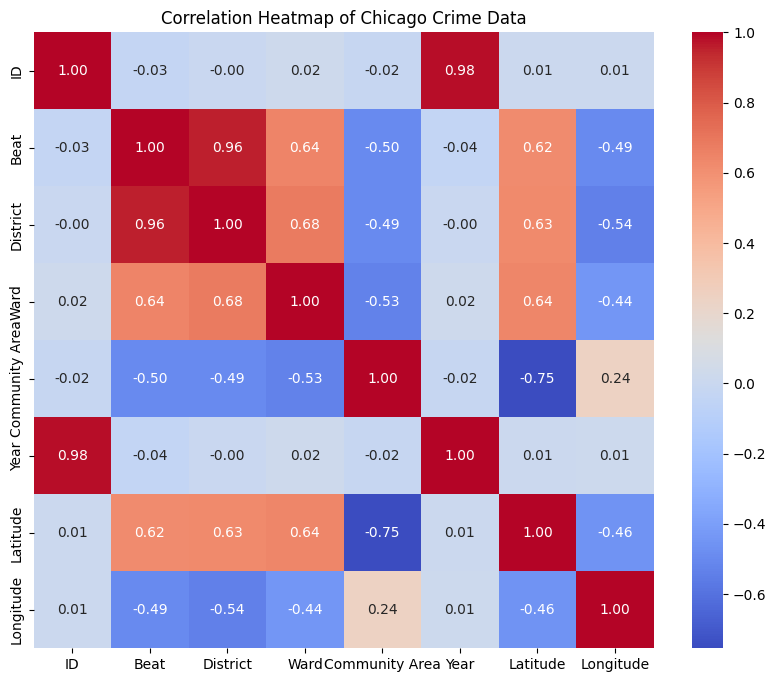

In [102]:
# Generate a correlation matrix for numerical columns
correlation_matrix = data.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Chicago Crime Data")
plt.show()

The heatmap reveals strong positive correlations between `Beat` and `District` (~0.96), indicating redundancy, and between `ID` and `Year` (~0.98), showing IDs are sequentially tied to the year. Spatial features like `Latitude` and `Community Area` (~0.75) and `District` and `Longitude` (~-0.54) highlight significant geographic patterns. Weak correlations with `Year` suggest limited direct temporal links with other features, emphasizing the need for temporal feature engineering (e.g., extracting `hour` or `month` from `Date`). For modeling, spatial and temporal patterns are key, while redundant features like `Beat` or `District` may need to be dropped to avoid multicollinearity.

## Outliers Analysis

In [103]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
print(data[numerical_columns].describe())


                 ID          Beat      District          Ward  Community Area  \
count  7.110971e+06  7.110971e+06  7.110971e+06  7.110971e+06    7.110971e+06   
mean   8.022682e+06  1.179205e+03  1.128439e+01  2.277616e+01    3.743514e+01   
std    3.282999e+06  7.026190e+02  6.955618e+00  1.384714e+01    2.153685e+01   
min    1.957000e+03  1.110000e+02  1.000000e+00  1.000000e+00    0.000000e+00   
25%    5.136316e+06  6.210000e+02  6.000000e+00  1.000000e+01    2.300000e+01   
50%    8.045473e+06  1.033000e+03  1.000000e+01  2.300000e+01    3.200000e+01   
75%    1.094852e+07  1.724000e+03  1.700000e+01  3.400000e+01    5.700000e+01   
max    1.359903e+07  2.535000e+03  3.100000e+01  5.000000e+01    7.700000e+01   

               Year      Latitude     Longitude  
count  7.110971e+06  7.110971e+06  7.110971e+06  
mean   2.011770e+03  4.184207e+01 -8.767134e+01  
std    6.231935e+00  8.892586e-02  6.121339e-02  
min    2.003000e+03  3.661945e+01 -9.168657e+01  
25%    2.006000e+03 

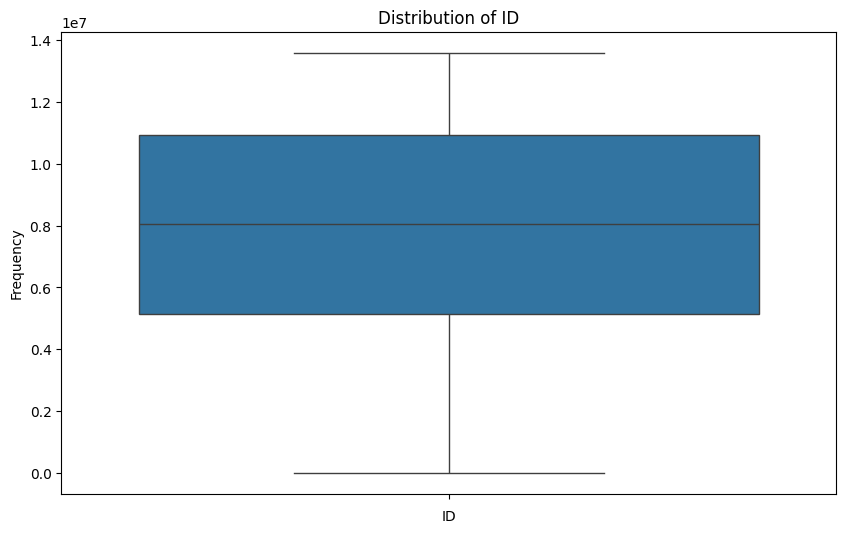

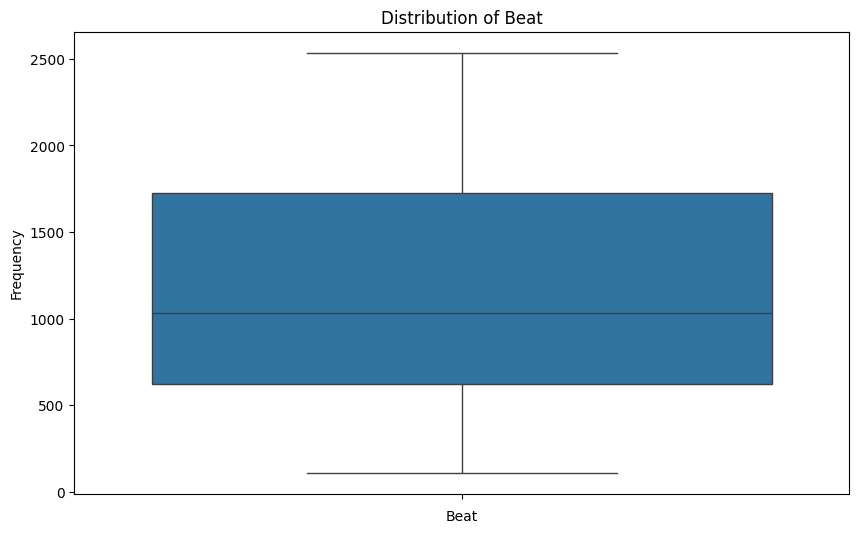

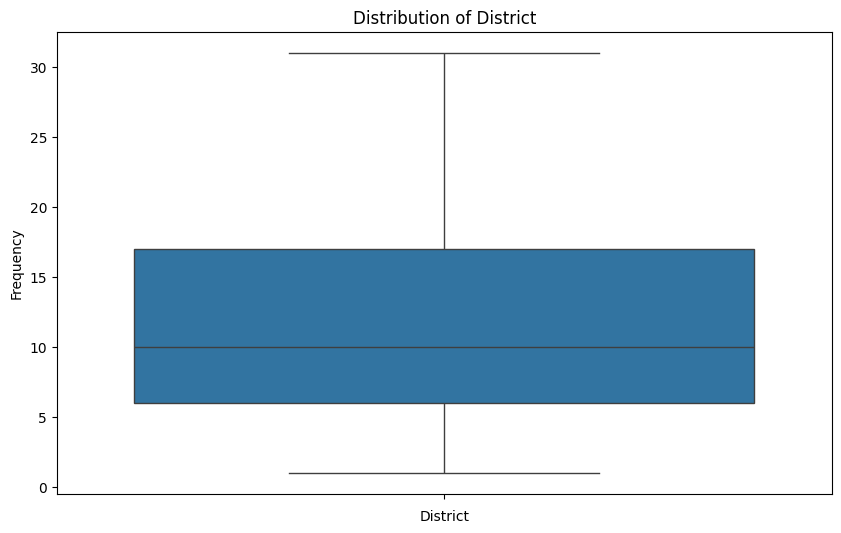

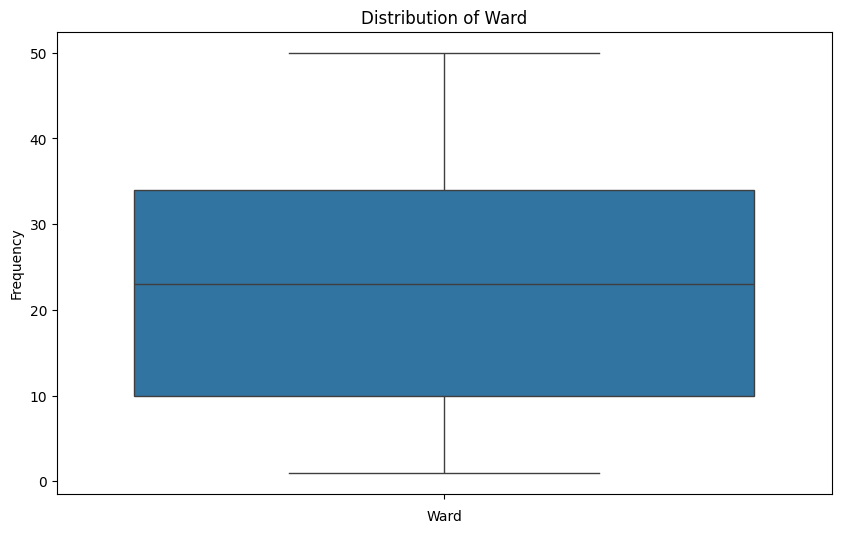

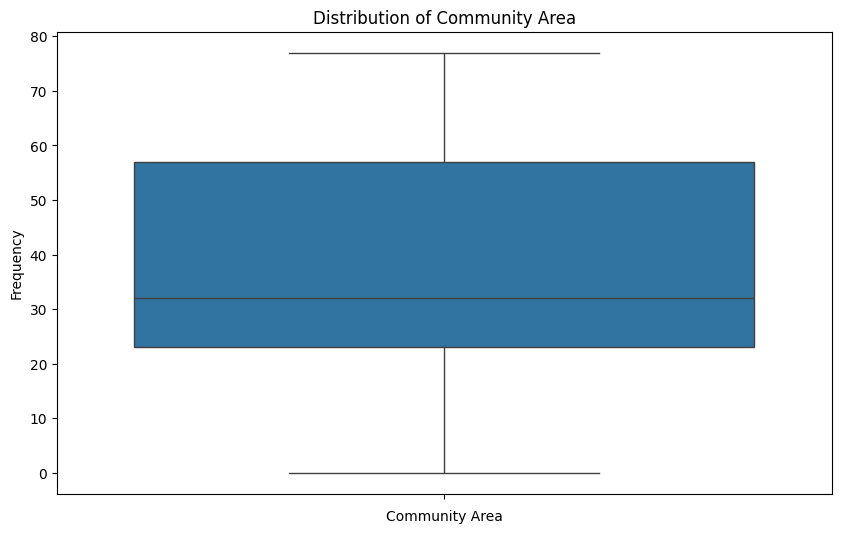

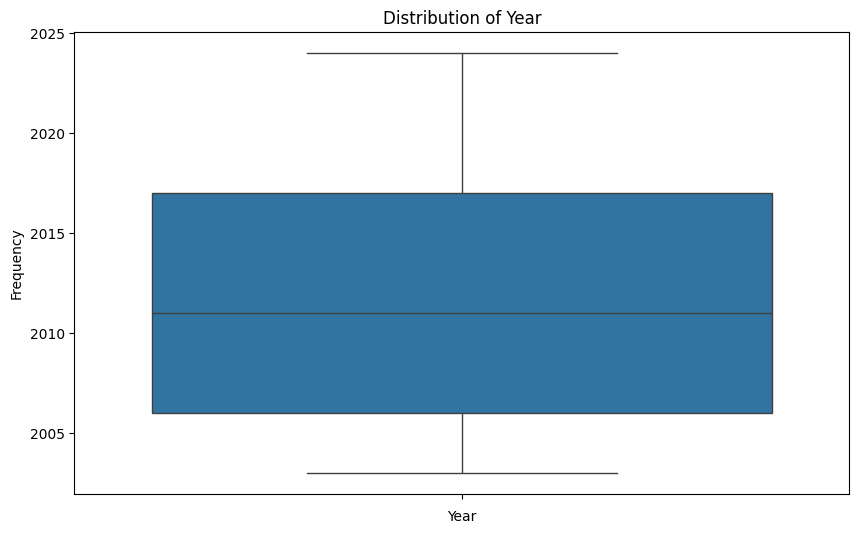

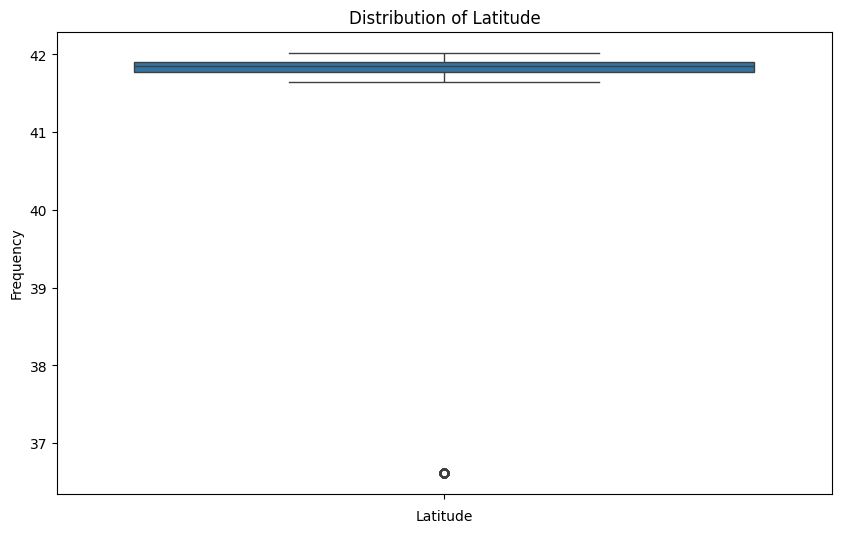

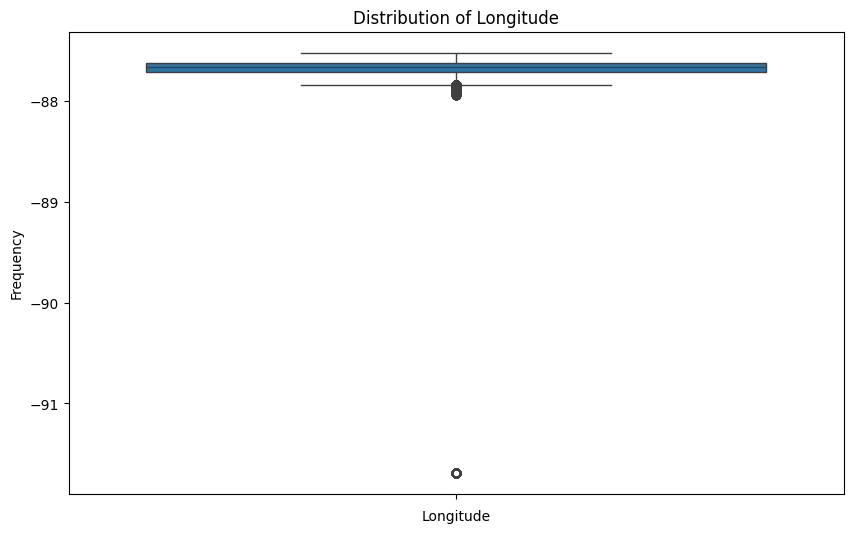

In [104]:
## sub plot for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [105]:
# Calculate IQR for each numerical column
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f'{col}: Found {len(outliers)} outliers')


ID: Found 0 outliers
Beat: Found 0 outliers
District: Found 0 outliers
Ward: Found 0 outliers
Community Area: Found 0 outliers
Year: Found 0 outliers
Latitude: Found 110 outliers
Longitude: Found 33755 outliers


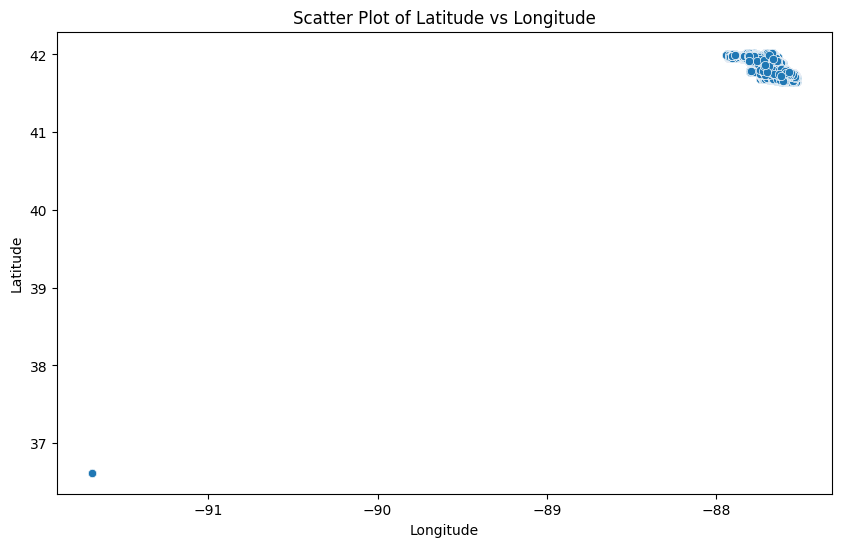

In [106]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=data)
plt.title('Scatter Plot of Latitude vs Longitude')
plt.show()


## Checking any abnormalities in the latitude and longiotude

In [107]:
# Define Chicago boundaries
latitude_min, latitude_max = 41.644, 42.023
longitude_min, longitude_max = -87.940, -87.523

# Identify data outside boundaries
invalid_latitude = data[(data['Latitude'] < latitude_min) | (data['Latitude'] > latitude_max)]
invalid_longitude = data[(data['Longitude'] < longitude_min) | (data['Longitude'] > longitude_max)]

print(f"Invalid Latitude Entries: {len(invalid_latitude)}")
print(f"Invalid Longitude Entries: {len(invalid_longitude)}")


Invalid Latitude Entries: 110
Invalid Longitude Entries: 110


In [108]:
# Randomly sample outliers
longitude_outliers = data[(data['Longitude'] < longitude_min) | (data['Longitude'] > longitude_max)]
print(longitude_outliers.sample(5),len(longitude_outliers))


              ID Case Number                    Date                    Block  \
5606606  8188342    HT417054  07/26/2011 11:15:00 AM  039XX N KENNEDY EXPY IB   
5680539  8318969    HT552889  10/21/2011 08:00:00 AM          035XX W 54TH PL   
5599360  8140379    HT374120  06/30/2011 07:17:00 PM  016XX N KENNEDY EXPY IB   
581624   7020652    HR426645  07/13/2009 12:00:00 PM  072XX W KENNEDY EXPY IB   
5211233  7543348    HS347096  06/06/2010 04:00:00 PM  072XX W KENNEDY EXPY IB   

         IUCR Primary Type                   Description  Arrest  Domestic  \
5606606  0486      BATTERY       DOMESTIC BATTERY SIMPLE   False      True   
5680539  0820        THEFT                $500 AND UNDER   False     False   
5599360  1811    NARCOTICS  POSS: CANNABIS 30GMS OR LESS    True     False   
581624   031A      ROBBERY                ARMED: HANDGUN   False     False   
5211233  0820        THEFT                $500 AND UNDER   False     False   

         Beat  District  Ward  Community Are

In [109]:
# Filter valid and outlier data
valid_data = data[(data['Longitude'] >= longitude_min) & (data['Longitude'] <= longitude_max)]
outlier_data = data[(data['Longitude'] < longitude_min) | (data['Longitude'] > longitude_max)]

# Analyze outlier data separately
print(outlier_data.describe())


                 ID         Beat    District        Ward  Community Area  \
count  1.100000e+02   110.000000  110.000000  110.000000      110.000000   
mean   7.980776e+06  1177.527273   11.490909   24.227273       37.736364   
std    1.247990e+06   588.121168    5.841555   11.817930       21.632747   
min    6.063108e+06   111.000000    1.000000    2.000000        7.000000   
25%    7.126411e+06   822.000000    8.000000   14.000000       23.000000   
50%    7.992430e+06  1213.000000   12.000000   27.000000       28.000000   
75%    8.475384e+06  1612.000000   16.000000   32.000000       63.000000   
max    1.285288e+07  2535.000000   25.000000   45.000000       76.000000   

              Year      Latitude   Longitude  
count   110.000000  1.100000e+02  110.000000  
mean   2010.854545  3.661945e+01  -91.686566  
std       2.529954  1.427589e-14    0.000000  
min    2008.000000  3.661945e+01  -91.686566  
25%    2009.000000  3.661945e+01  -91.686566  
50%    2011.000000  3.661945e+01 

From the descriptive statistics of the outlier data (Latitude = 36.61945, Longitude = -91.686566 for all 110 rows):

Fixed Latitude and Longitude:

The mean, minimum, maximum, and all quartiles for Latitude and Longitude are identical, indicating these rows likely contain placeholder or default values for location data.
Diverse Attributes in Other Columns:

District, Ward, and Community Area have a wide range of values, suggesting these entries span multiple areas or administrative boundaries, which conflicts with the fixed coordinates.
The Year spans from 2008 to 2022, showing these records are distributed over time but share invalid coordinates.
No Meaningful Location Information:

Since the location fields are invalid, they cannot contribute to spatial analysis or predictions involving geographic data.

In [110]:
# remove outliers
# Remove rows with outliers in latitude and longitude
data_cleaned = data[
    (data['Longitude'] >= longitude_min) & (data['Longitude'] <= longitude_max) &
    (data['Latitude'] >= latitude_min) & (data['Latitude'] <= latitude_max)
]
print(f"Cleaned Dataset Size: {len(data_cleaned)}")

Cleaned Dataset Size: 7110861


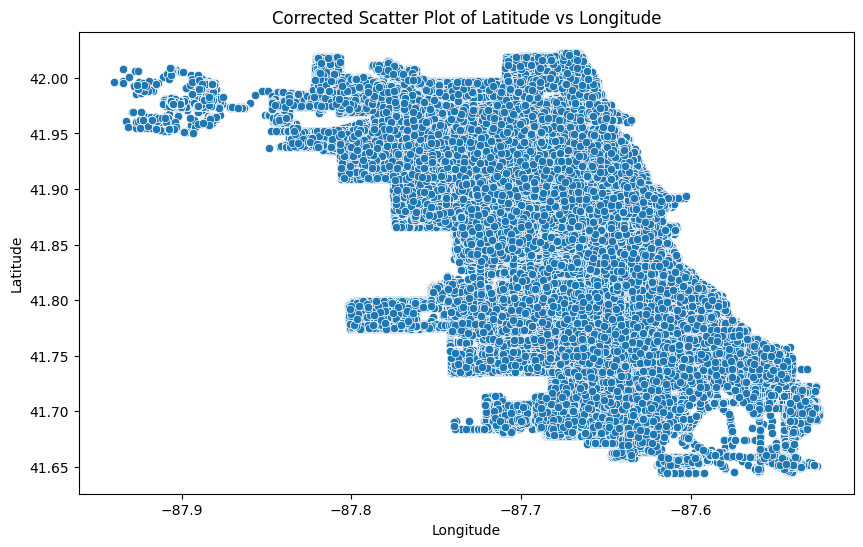

In [111]:
# Scatter plot for corrected data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=data_cleaned)
plt.title('Corrected Scatter Plot of Latitude vs Longitude')
plt.show()

# Feature Engineering

In [112]:
# Convert 'Date' column to datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

# Extract features
data_cleaned['Hour'] = data_cleaned['Date'].dt.hour
data_cleaned['Day_of_Week'] = data_cleaned['Date'].dt.dayofweek  # Monday=0, Sunday=6
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Year'] = data_cleaned['Date'].dt.year
data_cleaned['Is_Weekend'] = data_cleaned['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)
data_cleaned['Time_of_Day'] = pd.cut(
    data_cleaned['Hour'], 
    bins=[0, 6, 12, 18, 24], 
    labels=['Night', 'Morning', 'Afternoon', 'Evening'], 
    right=False
)

# Check the new features
data_cleaned.head()


/var/folders/mv/fn0_k_w53c51rdr43rfnd7gr0000gn/T/ipykernel_51551/1987297050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])
/var/folders/mv/fn0_k_w53c51rdr43rfnd7gr0000gn/T/ipykernel_51551/1987297050.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Hour'] = data_cleaned['Date'].dt.hour
/var/folders/mv/fn0_k_w53c51rdr43rfnd7gr0000gn/T/ipykernel_51551/1987297050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,...,FBI Code,Year,Updated On,Latitude,Longitude,Hour,Day_of_Week,Month,Is_Weekend,Time_of_Day
11,12045583,JD226426,2020-05-07 10:24:00,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,False,False,212,...,06,2020,05/14/2020 08:47:15 AM,41.830482,-87.621752,10,3,5,0,Morning
12,12031001,JD209965,2020-04-16 05:00:00,005XX W 32ND ST,0460,BATTERY,SIMPLE,True,False,915,...,08B,2020,04/23/2020 03:45:11 PM,41.836310,-87.639624,5,3,4,0,Night
13,12093529,JD282112,2020-07-01 10:16:00,081XX S COLES AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,True,False,422,...,04A,2020,07/08/2020 03:41:45 PM,41.747610,-87.549179,10,2,7,0,Morning
14,12178140,JD381597,2020-09-27 23:29:00,065XX S WOLCOTT AVE,0460,BATTERY,SIMPLE,False,False,726,...,08B,2020,10/04/2020 03:43:55 PM,41.774878,-87.671375,23,6,9,1,Evening
15,4144897,HL474854,2005-07-10 15:00:00,062XX S ABERDEEN ST,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,False,False,712,...,04B,2005,02/28/2018 03:56:25 PM,41.781003,-87.652107,15,6,7,1,Afternoon


# Exploratory Data Analysis

### rime by Hour

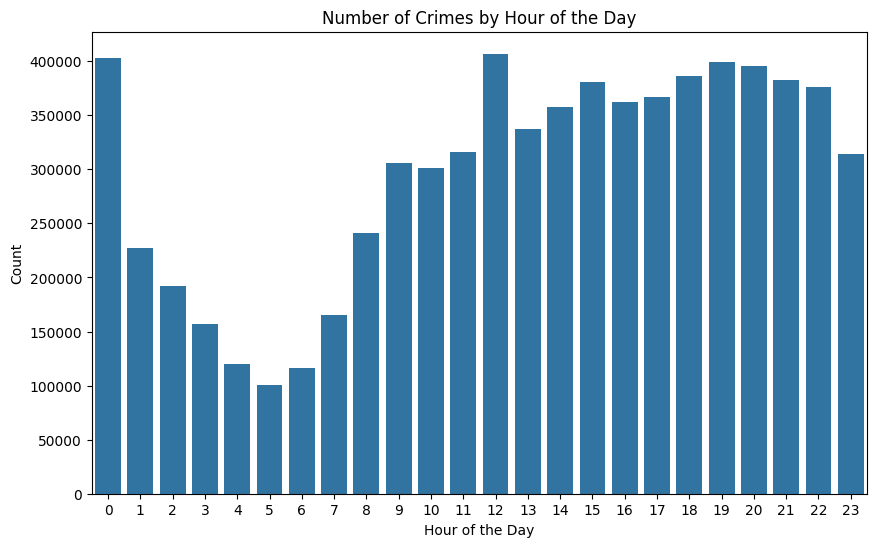

In [113]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=data_cleaned)
plt.title('Number of Crimes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

### Crimes by Day of Week:

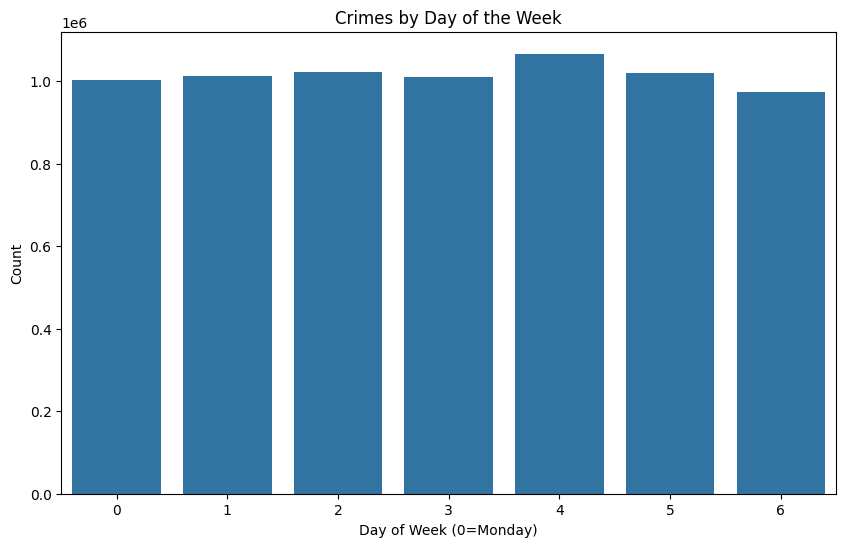

In [114]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Day_of_Week', order=range(0, 7))
plt.title('Crimes by Day of the Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Count')
plt.show()


### Crimes by Time of Day:

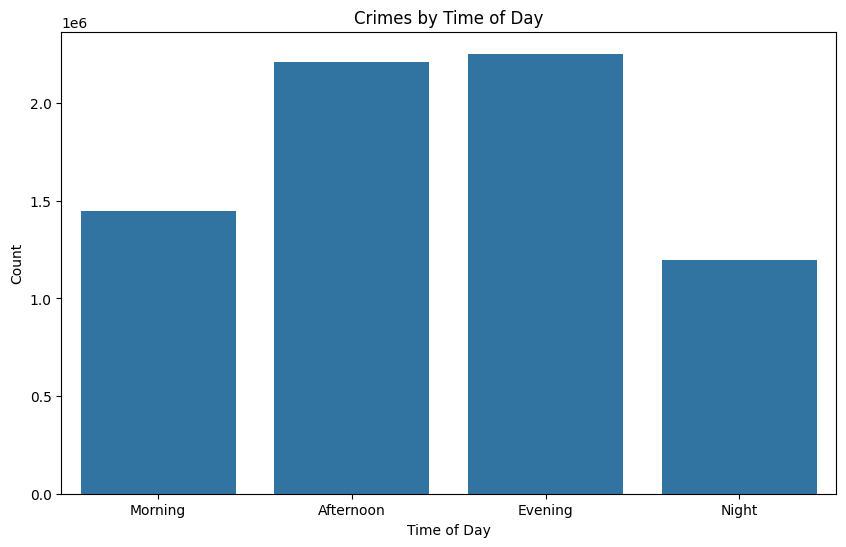

In [115]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Time_of_Day', order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Crimes by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()


# combining the zip codes with the crime data

In [116]:
import geopandas as gpd
from shapely.wkt import loads
from shapely.geometry import Point



# Load ZIP code data as GeoDataFrame
zip_codes_data = pd.read_csv("/Users/saitejasriyerramsetti/Desktop/chicago crime/data/Zip_Codes.csv")

# Convert 'the_geom' column to geometry
zip_codes_data['geometry'] = zip_codes_data['the_geom'].apply(loads)

# Convert to GeoDataFrame
zip_codes_gdf = gpd.GeoDataFrame(zip_codes_data, geometry='geometry', crs="EPSG:4326")

# Drop unnecessary columns if needed (optional)
zip_codes_gdf = zip_codes_gdf[['ZIP', 'geometry']]
zip_codes_gdf.head()


,ZIP,geometry
0,60647,"MULTIPOLYGON (((-87.67762 41.91776, -87.67761 ..."
1,60639,"MULTIPOLYGON (((-87.72683 41.92265, -87.72693 ..."
2,60707,"MULTIPOLYGON (((-87.785 41.90915, -87.78531 41..."
3,60622,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
4,60651,"MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ..."


In [117]:
from shapely.geometry import Point

# Convert data_cleaned to GeoDataFrame
crime_points = gpd.GeoDataFrame(
    data_cleaned,
    geometry=[Point(xy) for xy in zip(data_cleaned['Longitude'], data_cleaned['Latitude'])],
    crs="EPSG:4326"  # Ensure CRS matches the ZIP code dataset
)


In [118]:
# Check CRS
print(zip_codes_gdf.crs)  # Should be "EPSG:4326"
print(crime_points.crs)   # Should also be "EPSG:4326"


EPSG:4326
EPSG:4326


In [119]:
# Perform spatial join
crime_with_zip = gpd.sjoin(crime_points, zip_codes_gdf, how="left", predicate="within")

# Drop the geometry column if not needed
crime_with_zip = crime_with_zip.drop(columns=['geometry'])

# Check the resulting dataset
print(crime_with_zip.head())


          ID Case Number                Date                Block  IUCR  \
11  12045583    JD226426 2020-05-07 10:24:00  035XX S INDIANA AVE  0820   
12  12031001    JD209965 2020-04-16 05:00:00      005XX W 32ND ST  0460   
13  12093529    JD282112 2020-07-01 10:16:00    081XX S COLES AVE  051A   
14  12178140    JD381597 2020-09-27 23:29:00  065XX S WOLCOTT AVE  0460   
15   4144897    HL474854 2005-07-10 15:00:00  062XX S ABERDEEN ST  0430   

   Primary Type                    Description  Arrest  Domestic  Beat  ...  \
11        THEFT                 $500 AND UNDER   False     False   212  ...   
12      BATTERY                         SIMPLE    True     False   915  ...   
13      ASSAULT           AGGRAVATED - HANDGUN    True     False   422  ...   
14      BATTERY                         SIMPLE   False     False   726  ...   
15      BATTERY  AGGRAVATED: OTHER DANG WEAPON   False     False   712  ...   

                Updated On   Latitude  Longitude Hour  Day_of_Week Month  

In [120]:
type(zip_codes_gdf)

geopandas.geodataframe.GeoDataFrame

In [121]:
crime_with_zip.isnull().sum()

ID                    0
Case Number           0
Date                  0
Block                 0
IUCR                  0
Primary Type          0
Description           0
Arrest                0
Domestic              0
Beat                  0
District              0
Ward                  0
Community Area        0
FBI Code              0
Year                  0
Updated On            0
Latitude              0
Longitude             0
Hour                  0
Day_of_Week           0
Month                 0
Is_Weekend            0
Time_of_Day           0
index_right       19284
ZIP               19284
dtype: int64

In [122]:
unmatched_rows = crime_with_zip[crime_with_zip['ZIP'].isnull()]
print(unmatched_rows.head())


            ID Case Number                Date                   Block  IUCR  \
800   10321198    HY510596 2015-11-21 23:41:00      050XX N HARLEM AVE  0560   
2149  13202581    JG414699 2023-09-06 20:00:00  100XX S CALIFORNIA AVE  0810   
2222  12090992    JD279448 2020-06-28 20:20:00       017XX W HOWARD ST  0860   
2322  12195605    JD401855 2020-10-16 23:05:00      081XX W HIGGINS RD  0320   
2357  12064658    JD248979 2020-05-31 19:45:00        017XX W 119TH ST  143A   

           Primary Type                    Description  Arrest  Domestic  \
800             ASSAULT                         SIMPLE   False     False   
2149              THEFT                      OVER $500   False     False   
2222              THEFT                   RETAIL THEFT   False     False   
2322            ROBBERY         STRONG ARM - NO WEAPON   False     False   
2357  WEAPONS VIOLATION  UNLAWFUL POSSESSION - HANDGUN   False     False   

      Beat  ...              Updated On   Latitude  Longitude 

       Latitude  Longitude                   Block
800   41.972095 -87.807088      050XX N HARLEM AVE
2149  41.710424 -87.691634  100XX S CALIFORNIA AVE
2222  42.019399 -87.675049       017XX W HOWARD ST
2322  41.985421 -87.829757      081XX W HIGGINS RD
2357  41.677486 -87.664130        017XX W 119TH ST


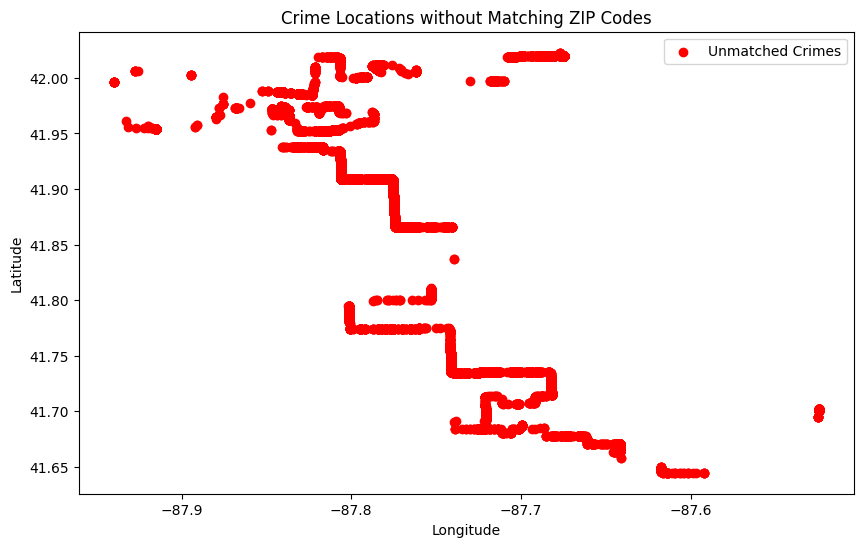

In [123]:
# Investigate rows with missing ZIP codes
unmatched_rows = crime_with_zip[crime_with_zip['ZIP'].isnull()]
print(unmatched_rows[['Latitude', 'Longitude', 'Block']].head())

# Visualize missing locations on a map
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(unmatched_rows['Longitude'], unmatched_rows['Latitude'], color='red', label='Unmatched Crimes')
plt.title('Crime Locations without Matching ZIP Codes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


Clearly document that 33% of ZIP codes were imputed using a nearest neighbor approach.
Highlight that this may affect spatial analysis accuracy, especially near city boundaries.

In [124]:
crime_with_zip.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,...,Updated On,Latitude,Longitude,Hour,Day_of_Week,Month,Is_Weekend,Time_of_Day,index_right,ZIP
11,12045583,JD226426,2020-05-07 10:24:00,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,False,False,212,...,05/14/2020 08:47:15 AM,41.830482,-87.621752,10,3,5,0,Morning,35.0,60653.0
12,12031001,JD209965,2020-04-16 05:00:00,005XX W 32ND ST,0460,BATTERY,SIMPLE,True,False,915,...,04/23/2020 03:45:11 PM,41.836310,-87.639624,5,3,4,0,Night,39.0,60616.0
13,12093529,JD282112,2020-07-01 10:16:00,081XX S COLES AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,True,False,422,...,07/08/2020 03:41:45 PM,41.747610,-87.549179,10,2,7,0,Morning,24.0,60617.0
14,12178140,JD381597,2020-09-27 23:29:00,065XX S WOLCOTT AVE,0460,BATTERY,SIMPLE,False,False,726,...,10/04/2020 03:43:55 PM,41.774878,-87.671375,23,6,9,1,Evening,22.0,60636.0
15,4144897,HL474854,2005-07-10 15:00:00,062XX S ABERDEEN ST,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,False,False,712,...,02/28/2018 03:56:25 PM,41.781003,-87.652107,15,6,7,1,Afternoon,10.0,60621.0


In [125]:
crime_with_zip.to_csv('/Users/saitejasriyerramsetti/Desktop/chicago crime/data/crime_with_zip_codes.csv', index=False)

In [126]:
print(crime_with_zip.shape,crime_with_zip['ID'].nunique())

(7110861, 25) 7110861


In [127]:
crime_with_zip.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward',
       'Community Area', 'FBI Code', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Hour', 'Day_of_Week', 'Month', 'Is_Weekend',
       'Time_of_Day', 'index_right', 'ZIP'],
      dtype='object')

In [128]:
crime_with_zip['ZIP'].nunique()

59

In [130]:
print(crime_with_zip['Primary Type'].nunique(), crime_with_zip['Primary Type'].unique())

35 ['THEFT' 'BATTERY' 'ASSAULT' 'WEAPONS VIOLATION' 'OTHER OFFENSE'
 'INTERFERENCE WITH PUBLIC OFFICER' 'BURGLARY' 'NARCOTICS'
 'MOTOR VEHICLE THEFT' 'CRIMINAL DAMAGE' 'DECEPTIVE PRACTICE'
 'OFFENSE INVOLVING CHILDREN' 'CRIMINAL TRESPASS' 'ROBBERY' 'SEX OFFENSE'
 'PUBLIC PEACE VIOLATION' 'CRIMINAL SEXUAL ASSAULT' 'PROSTITUTION'
 'STALKING' 'HOMICIDE' 'KIDNAPPING' 'ARSON'
 'CONCEALED CARRY LICENSE VIOLATION' 'GAMBLING' 'LIQUOR LAW VIOLATION'
 'INTIMIDATION' 'CRIM SEXUAL ASSAULT' 'OBSCENITY' 'PUBLIC INDECENCY'
 'NON-CRIMINAL' 'HUMAN TRAFFICKING' 'OTHER NARCOTIC VIOLATION' 'RITUALISM'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'NON - CRIMINAL']


In [166]:
# Define the mapping
crime_mapping = {
    'THEFT': 'Property Crime',
    'BURGLARY': 'Property Crime',
    'MOTOR VEHICLE THEFT': 'Property Crime',
    'ARSON': 'Property Crime',
    'CRIMINAL DAMAGE': 'Property Crime',
    'CRIMINAL TRESPASS': 'Property Crime',
    'DECEPTIVE PRACTICE': 'Property Crime',
    'BATTERY': 'Violent Crime',
    'ASSAULT': 'Violent Crime',
    'HOMICIDE': 'Violent Crime',
    'ROBBERY': 'Violent Crime',
    'KIDNAPPING': 'Violent Crime',
    'WEAPONS VIOLATION': 'Violent Crime',
    'NARCOTICS': 'Substance Offense',
    'OTHER NARCOTIC VIOLATION': 'Substance Offense',
    'LIQUOR LAW VIOLATION': 'Substance Offense',
    'OFFENSE INVOLVING CHILDREN': 'Child-Related Crime',
    'CRIM SEXUAL ASSAULT': 'Child-Related Crime',
    'CRIMINAL SEXUAL ASSAULT': 'Child-Related Crime',
    'SEX OFFENSE': 'Sexual Offense',
    'PUBLIC INDECENCY': 'Sexual Offense',
    'OBSCENITY': 'Sexual Offense',
    'PUBLIC PEACE VIOLATION': 'Public Disorder',
    'PROSTITUTION': 'Public Disorder',
    'GAMBLING': 'Public Disorder',
    'INTIMIDATION': 'Public Disorder',
    'STALKING': 'Public Disorder',
    'NON-CRIMINAL': 'Non-Criminal',
    'NON-CRIMINAL (SUBJECT SPECIFIED)': 'Non-Criminal',
    'NON - CRIMINAL': 'Non-Criminal',
    'CONCEALED CARRY LICENSE VIOLATION': 'Non-Criminal',
    'OTHER OFFENSE': 'Other Offense',
    'RITUALISM': 'Other Offense',
    'HUMAN TRAFFICKING': 'Other Offense',
    'INTERFERENCE WITH PUBLIC OFFICER': 'Other Offense'
}

# Apply the mapping to the dataset
crime_with_zip['Consolidated_Type'] = crime_with_zip['Primary Type'].map(crime_mapping)

# Check the new consolidated types
print(crime_with_zip['Consolidated_Type'].value_counts())


Consolidated_Type
Property Crime         3590765
Violent Crime          2168514
Substance Offense       654893
Other Offense           459357
Public Disorder         127700
Child-Related Crime      80557
Sexual Offense           27494
Non-Criminal              1581
Name: count, dtype: int64


In [167]:
pd.crosstab(crime_with_zip['Consolidated_Type'], crime_with_zip['Year'])


Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Consolidated_Type,,,,,,,,,,,,,,,,,,,,,
Child-Related Crime,4427,4372,4094,3972,4221,3851,3712,3854,3760,3586,...,3350,3804,3713,3770,3935,3000,3171,3251,3306,2255
Non-Criminal,0,0,0,0,0,0,0,1,0,8,...,66,89,107,187,220,149,173,181,208,144
Other Offense,31320,29977,28434,27811,27496,26671,25796,22791,21219,18741,...,18599,18147,18051,18266,18280,12938,13951,14771,16233,12199
Property Crime,229065,224655,216853,216867,209871,210146,192842,184924,179853,172548,...,129315,142472,141834,138446,132295,104948,100754,129593,146298,96140
Public Disorder,10267,11640,10332,11832,11271,9700,8373,7333,6603,6296,...,4309,2897,2754,2648,2727,1909,1179,1605,1842,1342
Sexual Offense,2017,1745,1734,1526,1494,1402,1195,1150,1116,1081,...,927,1016,1024,1225,1390,944,1059,1185,1374,890
Substance Offense,55063,57872,56955,56456,55588,45958,42888,44117,39190,36043,...,21903,13488,11677,13062,15233,7414,4274,4246,5418,4166
Violent Crime,139838,136883,131478,127052,125609,121909,110948,105594,99344,97129,...,79465,85356,85803,85948,85076,76646,78299,80049,87221,61328


/var/folders/mv/fn0_k_w53c51rdr43rfnd7gr0000gn/T/ipykernel_51551/1762683407.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




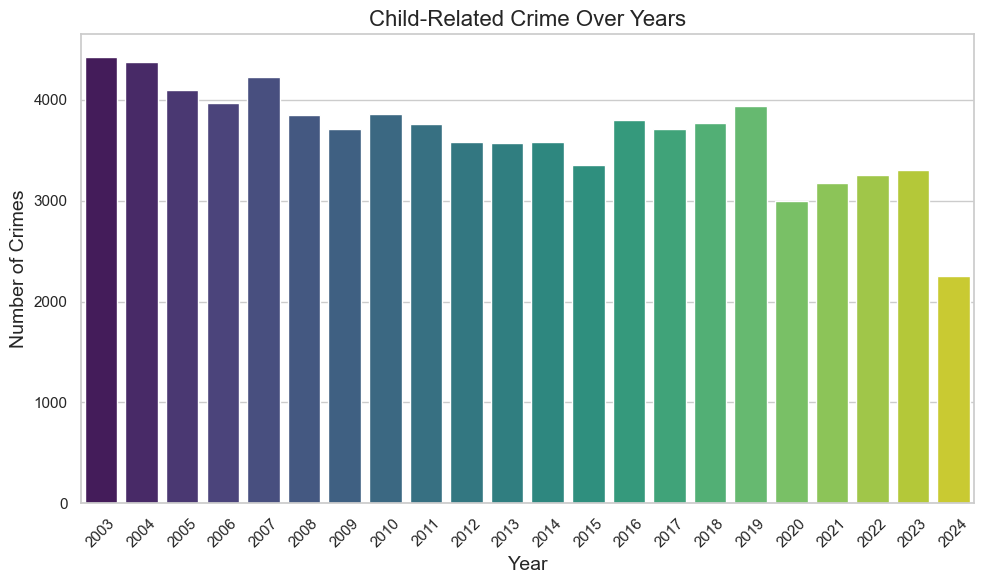

/var/folders/mv/fn0_k_w53c51rdr43rfnd7gr0000gn/T/ipykernel_51551/1762683407.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




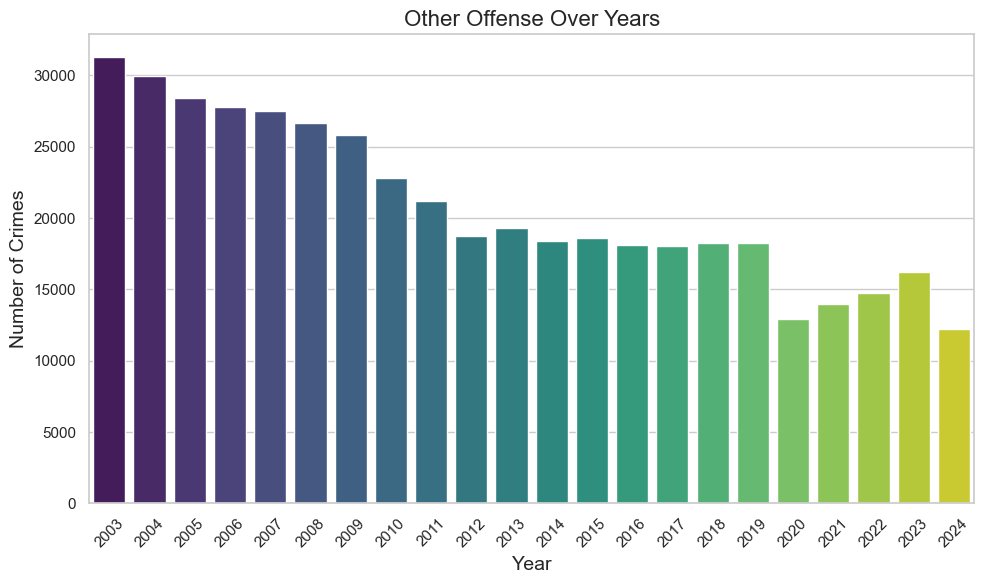

/var/folders/mv/fn0_k_w53c51rdr43rfnd7gr0000gn/T/ipykernel_51551/1762683407.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




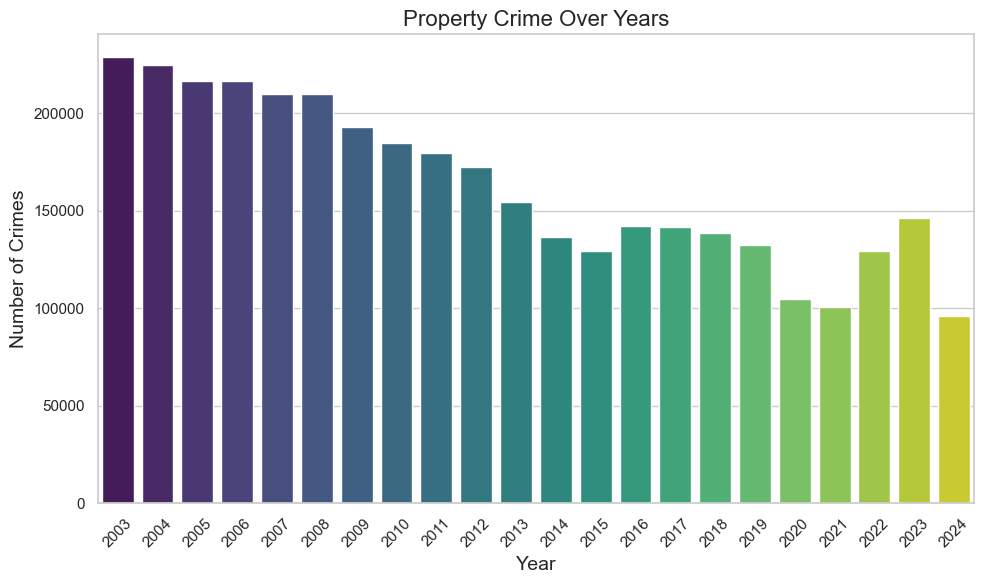

/var/folders/mv/fn0_k_w53c51rdr43rfnd7gr0000gn/T/ipykernel_51551/1762683407.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




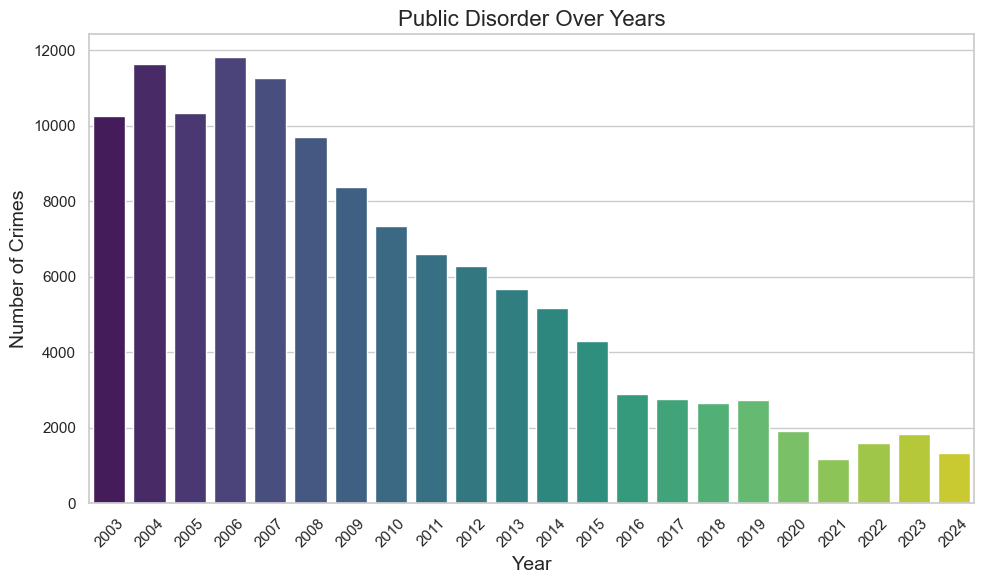

/var/folders/mv/fn0_k_w53c51rdr43rfnd7gr0000gn/T/ipykernel_51551/1762683407.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




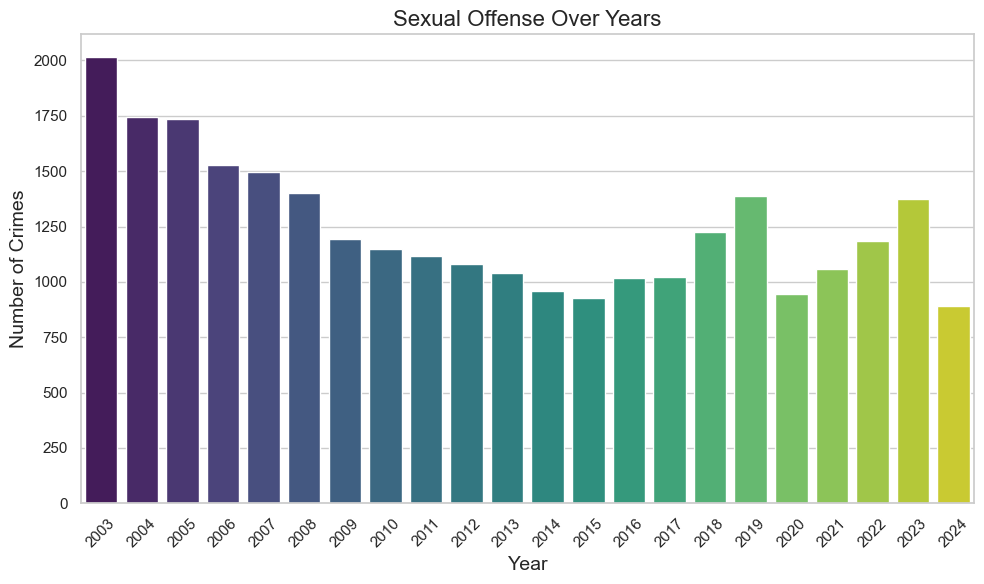

/var/folders/mv/fn0_k_w53c51rdr43rfnd7gr0000gn/T/ipykernel_51551/1762683407.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




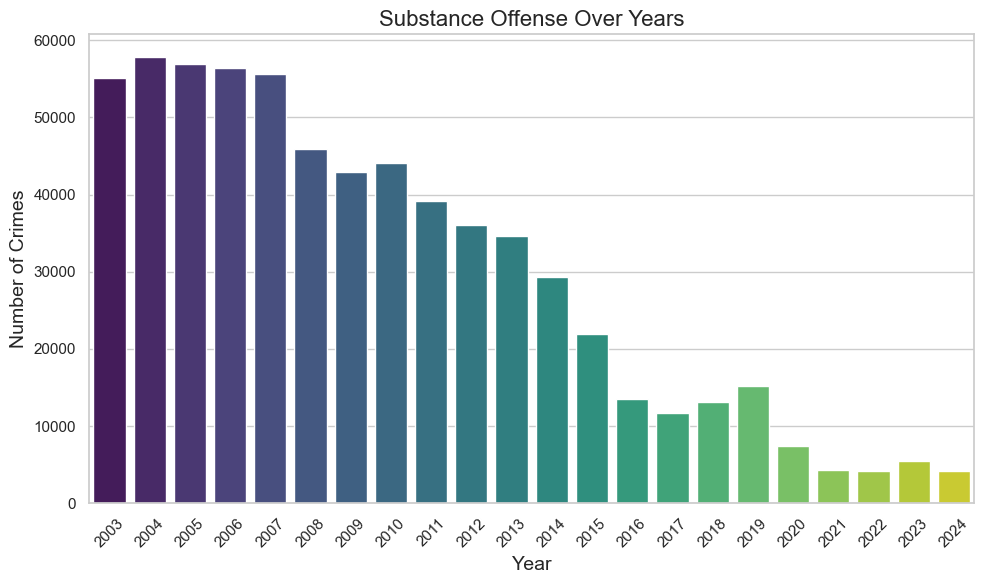

/var/folders/mv/fn0_k_w53c51rdr43rfnd7gr0000gn/T/ipykernel_51551/1762683407.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




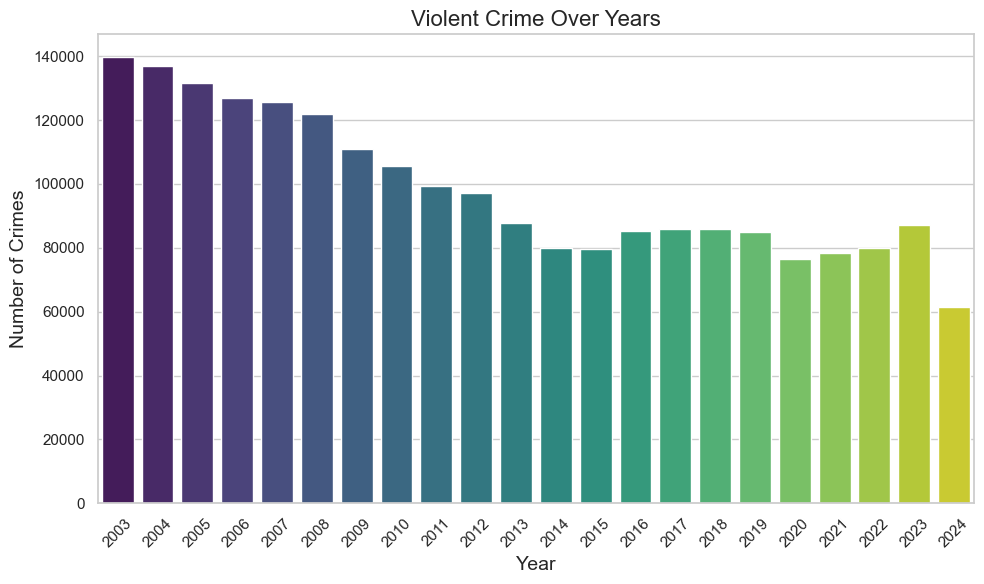

/var/folders/mv/fn0_k_w53c51rdr43rfnd7gr0000gn/T/ipykernel_51551/1762683407.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




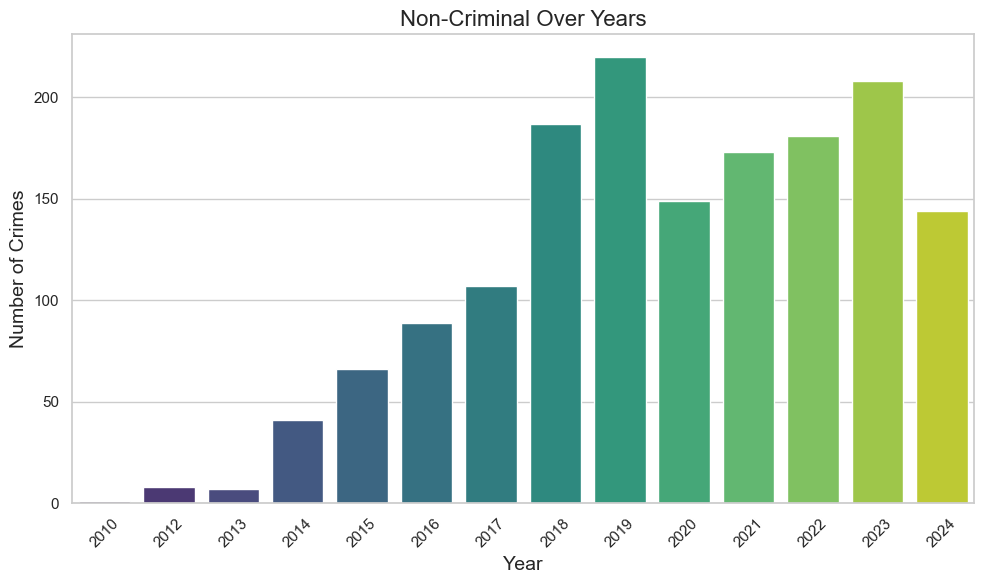

In [168]:
grouped_data = crime_with_zip.groupby(['Year', 'Consolidated_Type']).size().reset_index(name='Crime Count')
# Set the plot style
sns.set_theme(style="whitegrid")

# Get unique consolidated types
unique_crime_types = grouped_data['Consolidated_Type'].unique()

# Create separate plots for each crime type
for crime_type in unique_crime_types:
    # Filter data for the current crime type
    crime_data = grouped_data[grouped_data['Consolidated_Type'] == crime_type]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=crime_data, x='Year', y='Crime Count', palette='viridis')
    
    # Add titles and labels
    plt.title(f'{crime_type} Over Years', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Crimes', fontsize=14)
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [155]:
crime_with_zip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7110861 entries, 11 to 8156507
Data columns (total 26 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 int64         
 1   Case Number        object        
 2   Date               datetime64[ns]
 3   Block              object        
 4   IUCR               object        
 5   Primary Type       object        
 6   Description        object        
 7   Arrest             bool          
 8   Domestic           bool          
 9   Beat               int64         
 10  District           float64       
 11  Ward               float64       
 12  Community Area     float64       
 13  FBI Code           object        
 14  Year               int32         
 15  Updated On         object        
 16  Latitude           float64       
 17  Longitude          float64       
 18  Hour               int32         
 19  Day_of_Week        int32         
 20  Month              int32    

In [158]:
crime_with_zip['Consolidated_Type'].value_counts() # I would like to consider the consolidated crime to be ,y primary target

Consolidated_Type
Property Crime         3269261
Violent Crime          2168514
Substance Offense       654893
Other Offense           459357
Public Disorder         127700
Child-Related Crime      80557
Sexual Offense           27494
Non-Criminal              1581
Name: count, dtype: int64

In [169]:
crime_with_zip.isnull().sum()

ID                       0
Case Number              0
Date                     0
Block                    0
IUCR                     0
Primary Type             0
Description              0
Arrest                   0
Domestic                 0
Beat                     0
District                 0
Ward                     0
Community Area           0
FBI Code                 0
Year                     0
Updated On               0
Latitude                 0
Longitude                0
Hour                     0
Day_of_Week              0
Month                    0
Is_Weekend               0
Time_of_Day              0
index_right          19284
ZIP                  19284
Consolidated_Type        0
dtype: int64

In [174]:
crime_with_zip[crime_with_zip['ZIP'].isnull()]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,...,Latitude,Longitude,Hour,Day_of_Week,Month,Is_Weekend,Time_of_Day,index_right,ZIP,Consolidated_Type
800,10321198,HY510596,2015-11-21 23:41:00,050XX N HARLEM AVE,0560,ASSAULT,SIMPLE,False,False,1613,...,41.972095,-87.807088,23,5,11,1,Evening,NaN,NaN,Violent Crime
2149,13202581,JG414699,2023-09-06 20:00:00,100XX S CALIFORNIA AVE,0810,THEFT,OVER $500,False,False,2211,...,41.710424,-87.691634,20,2,9,0,Evening,NaN,NaN,Property Crime
2222,12090992,JD279448,2020-06-28 20:20:00,017XX W HOWARD ST,0860,THEFT,RETAIL THEFT,False,False,2422,...,42.019399,-87.675049,20,6,6,1,Evening,NaN,NaN,Property Crime
2322,12195605,JD401855,2020-10-16 23:05:00,081XX W HIGGINS RD,0320,ROBBERY,STRONG ARM - NO WEAPON,False,False,1614,...,41.985421,-87.829757,23,4,10,0,Evening,NaN,NaN,Violent Crime
2357,12064658,JD248979,2020-05-31 19:45:00,017XX W 119TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,False,False,2234,...,41.677486,-87.664130,19,6,5,1,Evening,NaN,NaN,Violent Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8153375,12064683,JD249028,2020-05-31 21:15:00,017XX W HOWARD ST,0610,BURGLARY,FORCIBLE ENTRY,False,False,2422,...,42.019398,-87.674880,21,6,5,1,Evening,NaN,NaN,Property Crime
8153745,12148753,JD347420,2020-08-27 18:15:00,059XX W ROOSEVELT RD,0460,BATTERY,SIMPLE,False,False,1513,...,41.865468,-87.773438,18,3,8,0,Evening,NaN,NaN,Violent Crime
8156000,12066767,JD251091,2020-06-02 12:07:00,017XX W HOWARD ST,3400,PUBLIC PEACE VIOLATION,LOOTING,True,False,2422,...,42.019398,-87.674880,12,1,6,0,Afternoon,NaN,NaN,Public Disorder
8156115,12048503,JD229840,2020-05-11 14:25:00,059XX W ROOSEVELT RD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,False,False,1513,...,41.865468,-87.773438,14,0,5,0,Afternoon,NaN,NaN,Property Crime


In [175]:
# Extract rows with null ZIP values
unmatched_points = crime_with_zip[crime_with_zip['ZIP'].isnull()]

# Check their locations
print(unmatched_points[['Latitude', 'Longitude']].head())


       Latitude  Longitude
800   41.972095 -87.807088
2149  41.710424 -87.691634
2222  42.019399 -87.675049
2322  41.985421 -87.829757
2357  41.677486 -87.664130


For the null values in the zip code:
If you have a ZIP code dataset with centroids, find the nearest ZIP code for each unmatched point.

Steps:
Calculate Distances to ZIP Code Centroids
Use the Haversine formula or a spatial join to find the nearest ZIP code for each unmatched point.
Assign the Nearest ZIP Code

In [180]:
from scipy.spatial import cKDTree
import numpy as np

# Load centroids of ZIP codes from zip_codes_gdf
zip_centroids = zip_codes_gdf.geometry.centroid
zip_coords = np.array([(geom.x, geom.y) for geom in zip_centroids])

# Build a KDTree for fast nearest neighbor lookup
zip_tree = cKDTree(zip_coords)

# Get unmatched points' coordinates
unmatched_coords = unmatched_points[['Longitude', 'Latitude']].values

# Query the nearest ZIP code
distances, indices = zip_tree.query(unmatched_coords)

# Assign the nearest ZIP code to unmatched points
unmatched_points['ZIP'] = zip_codes_gdf.iloc[indices]['ZIP'].values

# Check updated values
print(unmatched_points[['Latitude', 'Longitude', 'ZIP']])


          Latitude  Longitude    ZIP
800      41.972095 -87.807088  60656
2149     41.710424 -87.691634  60655
2222     42.019399 -87.675049  60626
2322     41.985421 -87.829757  60656
2357     41.677486 -87.664130  60643
...            ...        ...    ...
8153375  42.019398 -87.674880  60626
8153745  41.865468 -87.773438  60644
8156000  42.019398 -87.674880  60626
8156115  41.865468 -87.773438  60644
8156476  41.918949 -87.806095  60707

[19284 rows x 3 columns]


/var/folders/mv/fn0_k_w53c51rdr43rfnd7gr0000gn/T/ipykernel_51551/2299014533.py:5: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/mv/fn0_k_w53c51rdr43rfnd7gr0000gn/T/ipykernel_51551/2299014533.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [182]:
# Ensure 'index' is preserved for mapping
unmatched_points['index'] = unmatched_points.index
# Update ZIP column in crime_with_zip
for idx, row in unmatched_points.iterrows():
    crime_with_zip.loc[idx, 'ZIP'] = row['ZIP']

# Confirm the update
print(crime_with_zip.loc[crime_with_zip['ZIP'].isnull()])


/var/folders/mv/fn0_k_w53c51rdr43rfnd7gr0000gn/T/ipykernel_51551/2071149340.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Empty DataFrame
Columns: [ID, Case Number, Date, Block, IUCR, Primary Type, Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, Year, Updated On, Latitude, Longitude, Hour, Day_of_Week, Month, Is_Weekend, Time_of_Day, index_right, ZIP, Consolidated_Type]
Index: []

[0 rows x 26 columns]


In [185]:
crime_with_zip = crime_with_zip.drop(columns=['index_right'])

## Correlation between the target variable , numerical and categorical features

In [197]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif, mutual_info_classif
from scipy.stats import chi2_contingency

# Define features
numeric_features = ['Latitude', 'Longitude', 'District', 'Ward', 'Community Area', 'ZIP', 
                     'Beat', 'Year', 'Hour', 'Day_of_Week', 'Month', 'Is_Weekend']
# Drop high-cardinality features for faster computation
categorical_features = ['Arrest', 'Domestic', 'IUCR', 'Primary Type', 'FBI Code', 'Time_of_Day']


# Target variable
target = 'Consolidated_Type'

# Encode target variable (for statistical calculations)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(crime_with_zip[target])


    a.  Compute Correlations for Numeric Features

In [193]:
# ANOVA F-Test
f_scores, f_p_values = f_classif(crime_with_zip[numeric_features], encoded_target)

# Create a DataFrame for numeric correlations
numeric_corr_df = pd.DataFrame({
    'Feature': numeric_features,
    'ANOVA F-Score': f_scores,
    'P-Value': f_p_values
})
print(numeric_corr_df.sort_values(by='ANOVA F-Score', ascending=False))

    b. Compute Correlations for Categorical Features

In [198]:
# Function to compute Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Compute Cramér's V for each categorical feature
categorical_correlations = {}
for col in categorical_features:
    contingency_table = pd.crosstab(crime_with_zip[col], crime_with_zip[target])
    categorical_correlations[col] = cramers_v(contingency_table.values)

# Create a DataFrame for categorical correlations
categorical_corr_df = pd.DataFrame({
    'Feature': list(categorical_correlations.keys()),
    'Cramér\'s V': list(categorical_correlations.values())
})


    c. Combine Results

In [ ]:
# Combine numeric and categorical results
combined_corr_df = pd.concat([
    numeric_corr_df[['Feature', 'ANOVA F-Score', 'Mutual Information']],
    categorical_corr_df.rename(columns={'Cramér\'s V': 'Correlation'})[['Feature', 'Correlation', 'Mutual Information']]
], ignore_index=True)

# Sort by Mutual Information
combined_corr_df = combined_corr_df.sort_values(by='Mutual Information', ascending=False)


In [199]:

# Compute Cramér’s V
cramers_v_results = {}
for col in categorical_features:
    contingency_table = pd.crosstab(crime_with_zip[col], crime_with_zip[target])
    cramers_v_results[col] = cramers_v(contingency_table.values)

# Compute ANOVA F-Test for numeric features
f_scores, _ = f_classif(crime_with_zip[numeric_features], encoded_target)

# Combine results into a single DataFrame
fast_combined_corr_df = pd.DataFrame({
    'Feature': numeric_features + list(cramers_v_results.keys()),
    'Correlation': list(f_scores) + list(cramers_v_results.values())
})

print(fast_combined_corr_df.sort_values(by='Correlation', ascending=False))


           Feature   Correlation
7             Year  18854.971511
8             Hour  11097.669762
0         Latitude   9644.158462
4   Community Area   7407.623655
3             Ward   5915.200474
1        Longitude   5290.179696
6             Beat   4192.634941
2         District   3754.013300
11      Is_Weekend   1806.606768
9      Day_of_Week   1044.140422
10           Month    946.329400
5              ZIP    938.831566
14            IUCR      1.000000
15    Primary Type      1.000000
16        FBI Code      0.825092
12          Arrest      0.590190
13        Domestic      0.448226
17     Time_of_Day      0.075702


In [201]:
# encodeing the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
crime_with_zip['Encoded_Crime_Type'] = label_encoder.fit_transform(crime_with_zip['Consolidated_Type'])

In [202]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Select features and target
X = crime_with_zip[['Latitude', 'Longitude', 'Hour', 'Day_of_Week', 'Is_Weekend']]
y = crime_with_zip['Encoded_Crime_Type']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

# Force plot
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])

# Dependence plot
shap.dependence_plot('Hour', shap_values[1], X_test)


KeyboardInterrupt: 

In [203]:
crime_with_zip.to_csv('/Users/saitejasriyerramsetti/Desktop/chicago crime/data/crime_with_zip_codes.csv', index=False)

In [205]:
crime_with_zip.shape

(7110861, 26)

In [1]:
import pandas as pd

crime_with_zip = pd.read_csv('/Users/saitejasriyerramsetti/Desktop/chicago crime/data/crime_with_zip_codes.csv')

In [2]:
pd.set_option('display.max_columns', None)
crime_with_zip.head(1)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Latitude,Longitude,Hour,Day_of_Week,Month,Is_Weekend,Time_of_Day,ZIP,Consolidated_Type,Encoded_Crime_Type
0,12045583,JD226426,2020-05-07 10:24:00,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,False,False,212,2.0,3.0,35.0,06,2020,05/14/2020 08:47:15 AM,41.830482,-87.621752,10,3,5,0,Morning,60653.0,Property Crime,3


In [3]:
severity_mapping = {
    'Violent Crime': 'High',
    'Child-Related Crime': 'High',
    'Sexual Offense': 'High',
    'Property Crime': 'Moderate',
    'Substance Offense': 'Moderate',
    'Public Disorder': 'Moderate',
    'Other Offense': 'Low',
    'Non-Criminal': 'Low'
}


In [4]:
# Map consolidated types to severity
crime_with_zip['Crime_Severity'] = crime_with_zip['Consolidated_Type'].map(severity_mapping)

# Check the distribution of severity levels
print(crime_with_zip['Crime_Severity'].value_counts())


Crime_Severity
Moderate    4373358
High        2276565
Low          460938
Name: count, dtype: int64


In [5]:
# Encode severity levels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
crime_with_zip['Encoded_Crime_Severity'] = label_encoder.fit_transform(crime_with_zip['Crime_Severity'])

# Check the mapping of severity levels to numerical values
severity_classes = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Severity Encoding:", severity_classes)


Severity Encoding: {'High': 0, 'Low': 1, 'Moderate': 2}


In [6]:
crime_with_zip['Encoded_Crime_Severity'].value_counts()

Encoded_Crime_Severity
2    4373358
0    2276565
1     460938
Name: count, dtype: int64

In [7]:
crime_with_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7110861 entries, 0 to 7110860
Data columns (total 28 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   ID                      int64  
 1   Case Number             object 
 2   Date                    object 
 3   Block                   object 
 4   IUCR                    object 
 5   Primary Type            object 
 6   Description             object 
 7   Arrest                  bool   
 8   Domestic                bool   
 9   Beat                    int64  
 10  District                float64
 11  Ward                    float64
 12  Community Area          float64
 13  FBI Code                object 
 14  Year                    int64  
 15  Updated On              object 
 16  Latitude                float64
 17  Longitude               float64
 18  Hour                    int64  
 19  Day_of_Week             int64  
 20  Month                   int64  
 21  Is_Weekend              int64  

In [10]:
len(crime_with_zip[crime_with_zip['Year']>= 2017])

1873724

In [28]:
crime_with_zip = crime_with_zip[crime_with_zip['Year']>= 2017]
len(crime_with_zip)

1873724

In [13]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1873724 entries, 0 to 7110860
Data columns (total 28 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   ID                      int64  
 1   Case Number             object 
 2   Date                    object 
 3   Block                   object 
 4   IUCR                    object 
 5   Primary Type            object 
 6   Description             object 
 7   Arrest                  bool   
 8   Domestic                bool   
 9   Beat                    int64  
 10  District                float64
 11  Ward                    float64
 12  Community Area          float64
 13  FBI Code                object 
 14  Year                    int64  
 15  Updated On              object 
 16  Latitude                float64
 17  Longitude               float64
 18  Hour                    int64  
 19  Day_of_Week             int64  
 20  Month                   int64  
 21  Is_Weekend              int64  
 22 

In [29]:
crime_with_zip.to_csv('/Users/saitejasriyerramsetti/Desktop/chicago crime/data/crime2017-2024.csv', index=False)

In [22]:
import dask.dataframe as dd
ddf = dd.read_csv("/Users/saitejasriyerramsetti/Desktop/chicago crime/data/crime2017-2024.csv")

In [23]:
ddf['Latitude']= ddf['Latitude'].astype('float32')
ddf['Hour']= ddf['Hour'].astype('int8')
ddf['Longitude']= ddf['Longitude'].astype('float32')
ddf['Year']= ddf['Year'].astype('int16')
ddf['Month']= ddf['Month'].astype('int8')
ddf['Day_of_Week']= ddf['Day_of_Week'].astype('int8')
ddf['Arrest']= ddf['Arrest'].astype('int8')

In [25]:
ddf = ddf.drop(['Case Number', 'Block', 'Updated On'], axis=1)


In [26]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.01, min_samples=100).fit(geo_features)
ddf['Cluster'] = clustering.labels_


NameError: name 'geo_features' is not defined

In [27]:
crime_by_year = ddf.groupby('Year')['ID'].count().compute()
crime_by_year

In [18]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency


# Define numerical and categorical features
numerical_features = ['Latitude', 'Longitude', 'Hour', 'Day_of_Week', 'Month', 'Is_Weekend', 'ZIP']
categorical_features = ['FBI Code', 'Arrest', 'Domestic']
target_columns = ['Encoded_Crime_Type', 'Encoded_Crime_Severity', 'Arrest']

# Encode categorical features and targets
label_encoders = {}
for col in categorical_features + target_columns:
    label_encoders[col] = LabelEncoder()
    ddf[col] = ddf[col].map_partitions(lambda x: label_encoders[col].fit_transform(x.astype(str)))

# Compute correlations for each target
correlation_results = {}

# Function to compute Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

for target in target_columns:
    print(f"\nAnalyzing correlations with target: {target}\n")
    results = []

    # Numerical Features: Compute F-Score and Mutual Information
    for feature in numerical_features:
        # Convert to pandas for F-Score computation
        feature_data = ddf[[feature, target]].dropna().compute()

        f_score = f_classif(feature_data[[feature]], feature_data[target])[0][0]
        mi = mutual_info_classif(feature_data[[feature]], feature_data[target], discrete_features=False)[0]
        results.append((feature, "Numerical", f_score, mi))

    # Categorical Features: Compute Cramér's V
    for feature in categorical_features:
        # Convert to pandas for categorical correlation computation
        feature_data = ddf[[feature, target]].dropna().compute()

        contingency_table = pd.crosstab(feature_data[feature], feature_data[target])
        cramers_v_score = cramers_v(contingency_table.to_numpy())
        mi = mutual_info_classif(feature_data[[feature]], feature_data[target], discrete_features=True)[0]
        results.append((feature, "Categorical", cramers_v_score, mi))

    # Store results in a DataFrame
    correlation_df = pd.DataFrame(results, columns=['Feature', 'Type', 'Correlation (F-Score or Cramér\'s V)', 'Mutual Information'])
    correlation_results[target] = correlation_df.sort_values(by='Correlation (F-Score or Cramér\'s V)', ascending=False)
    print(correlation_results[target])




Analyzing correlations with target: Encoded_Crime_Type

       Feature         Type  Correlation (F-Score or Cramér's V)  \
0     Latitude    Numerical                         35544.053660   
2         Hour    Numerical                          7410.708480   
5   Is_Weekend    Numerical                          1542.162187   
3  Day_of_Week    Numerical                           966.354615   
6          ZIP    Numerical                           727.489099   
4        Month    Numerical                           456.292695   
7     FBI Code  Categorical                             0.595465   
8       Arrest  Categorical                             0.470532   
9     Domestic  Categorical                             0.383112   
1    Longitude    Numerical                       -100612.851173   

   Mutual Information  
0            0.091345  
2            0.029853  
5            0.071769  
3            0.061153  
6            0.042880  
4            0.031698  
7            0.861877  
8 

ValueError: Data must be 1-dimensional, got ndarray of shape (7110861, 2) instead